## Capturing real-life social network phenomenons 

### The Frech-Degroot Model using Karate Club Data Set

A social network of a university karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
G = nx.karate_club_graph()
G = nx.convert_node_labels_to_integers(G, first_label=1)

In [4]:
pos = nx.spring_layout(G, k = 2)

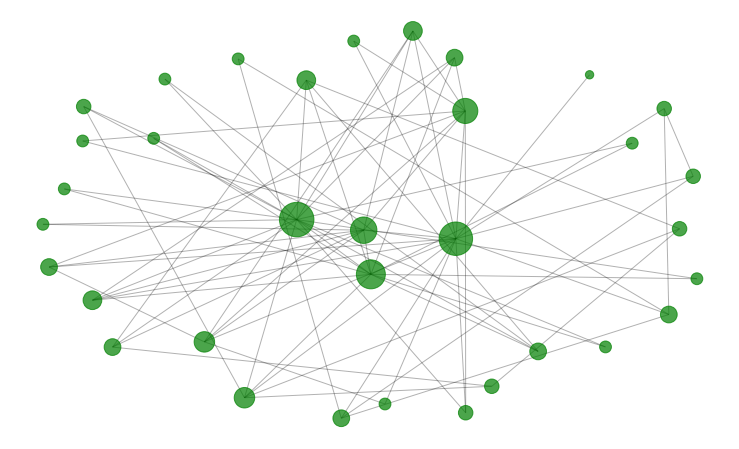

In [5]:
plt.figure(figsize=(13,8))
node_size = [G.degree(n)*70 for n in G]

nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='green', node_size=node_size, alpha=0.7)

plt.axis('off')
plt.show()

### Generating Opinions for individuals in the network

The Gaussian mixture model might be a better representation of what opinion distributions are like in real life. In the normal distribution model most people are unbiased or only slightly biased, when in the real world, polarization of opinions show that normal distributions does not closely resemble real-life opinion distributions. 

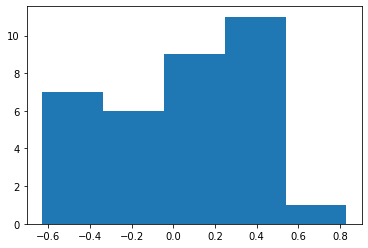

In [6]:
from scipy.stats import truncnorm
import random

sigma = 0.2
n = len(G)

xr = truncnorm((-0.3-0.35)/sigma,(1-0.35)/sigma,loc=0.35,scale=sigma)
xl = truncnorm((-1-(-0.35))/sigma,(0.3-(-0.35))/sigma,loc=-0.35,scale=sigma)


r = [random.random() for x in range(n)]
init_op = []

for i in range(n):
    if r[i] < 0.5:
        init_op.append(xl.rvs())
    else:
        init_op.append(xr.rvs())
        
plt.hist(init_op, 5)
plt.show()

for n in G:
    G.nodes[n]['opinion'] = round(init_op[n-1], 2)

In [10]:
karate_opinion = list(nx.get_node_attributes(G, 'opinion').values())

In [8]:
# conditionally label the more important nodes

labels = {}    
for node in G.nodes():
    if len(list(G.neighbors(node))) > 5:
        #set the node name as the key and the label as its value 
        labels[node] = node

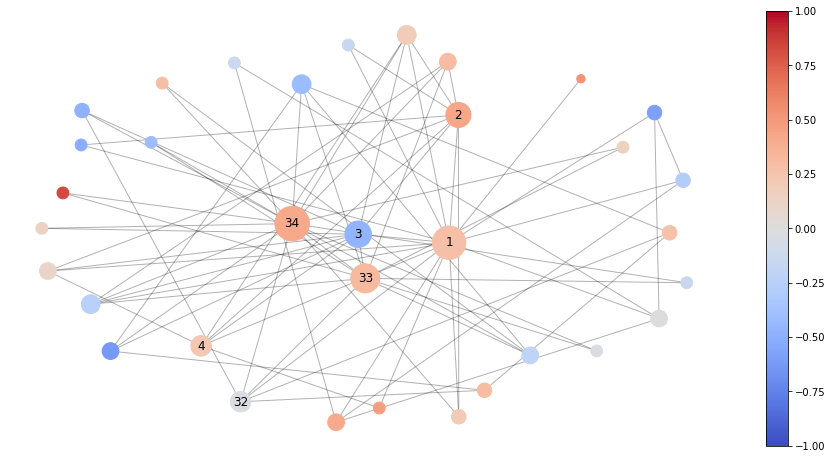

In [9]:
# drawing nodes and edges separately so we can capture collection for colobar
plt.figure(figsize=(16,8))

node_size = [G.degree(n)*70 for n in G]

nx.draw_networkx_edges(G, pos, alpha=0.3)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=karate_opinion, 
                            node_size=node_size, cmap=plt.cm.coolwarm)
nx.draw_networkx_labels(G, pos, labels)

nc.set_clim(-1,1)
plt.colorbar(nc)
plt.axis('off')
plt.show()

#### Model 1-1: Simple DeGroot Model
All the neighbors plus the node itself is equally weighted.

$$
x_i(t+1) = \frac{x_i(t) + \sum {x_j(t)}}{N}
$$

In [33]:
#initialize opinion
for n in G:
    G.nodes[n]['opinion'] = karate_opinion[n-1]

In [31]:
def simple_degroot(G, t, graph_interval):
    y = np.zeros(len(G))
    iteration = 0

    for i in range(t):
        iteration += 1
        if (i%graph_interval == 0):
            old_op = list(nx.get_node_attributes(G, 'opinion').values())
            plt.figure(figsize=(14,2))
            ax = plt.scatter(old_op, y, marker='x')
            ax.axes.yaxis.set_visible(False)
            plt.xlim([-1, 1])
            plt.title(('Iteration {}'.format(iteration)))
            plt.xlabel('Opinion Values')
            plt.show()

        for n in G:
            neighbors = [neigh for neigh in G.neighbors(n)]
            op_sum = 0

            for neigh in neighbors: 
                op_sum = op_sum + old_op[neigh-1]

            op_sum = (op_sum + old_op[n-1])/(len(neighbors) + 1)
            G.nodes[n]['opinion'] = round(op_sum, 2)

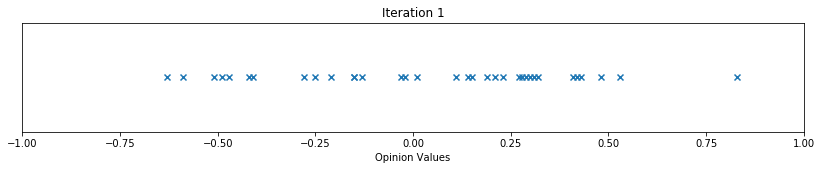

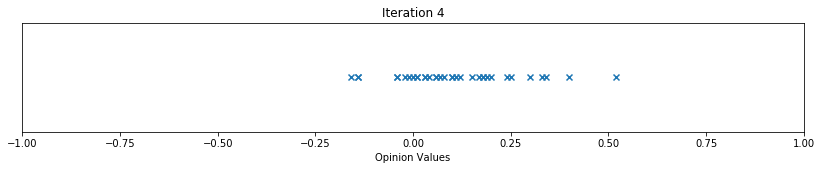

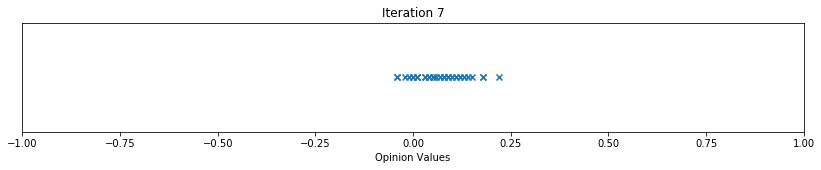

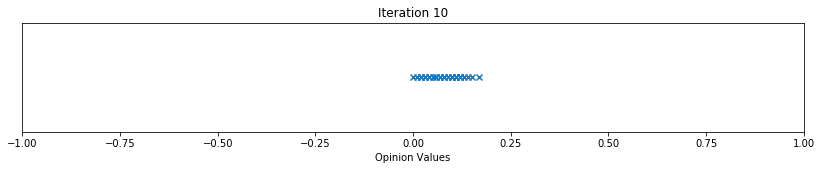

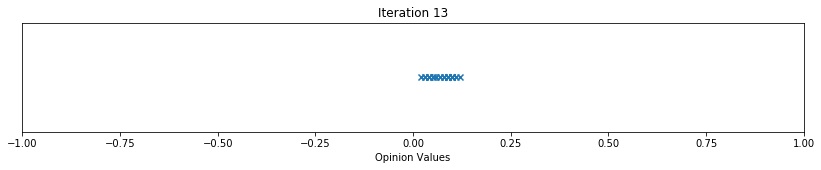

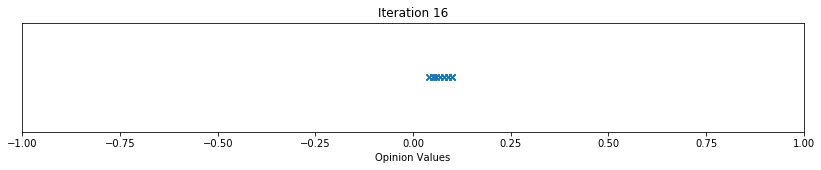

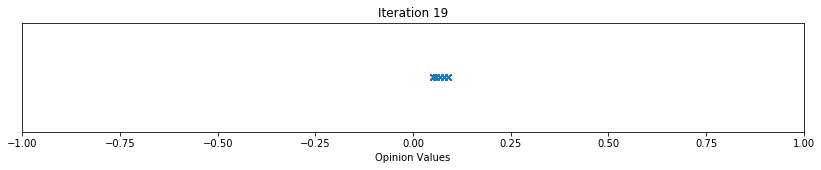

In [34]:
simple_degroot(G, 20, 3)

In [23]:
new_opinion = list(nx.get_node_attributes(G, 'opinion').values())

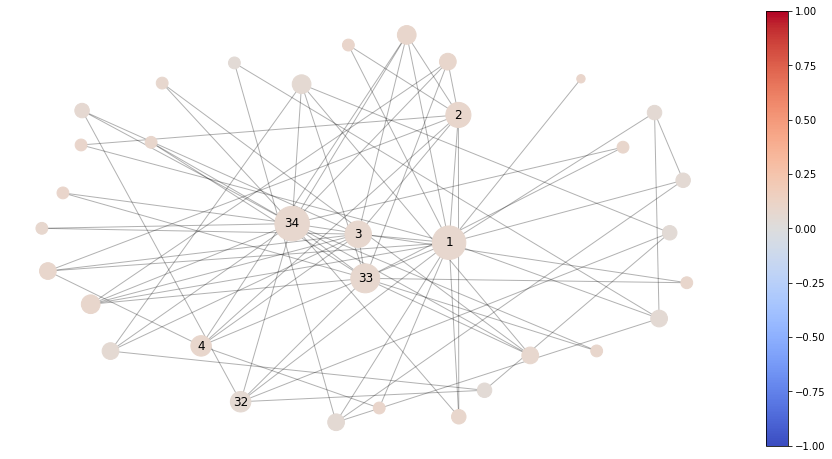

In [24]:
plt.figure(figsize=(16,8))

node_size = [G.degree(n)*70 for n in G]

nx.draw_networkx_edges(G, pos, alpha=0.3)
nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=new_opinion, 
                            node_size=node_size, cmap=plt.cm.coolwarm)
nx.draw_networkx_labels(G, pos, labels)

nc.set_clim(-1,1)
plt.colorbar(nc)
plt.axis('off')
plt.show()

#### Model 1-2: Averaged DeGroot Model

Typically instances of the deGroot model updated a user’s opinion by averaging their opinion with the mean of their neighboring opinions.[1] Therefore, the opinion $x_i$ of node $i$ at time $(t+1)$ equals 
$$
x_i(t+1) = \frac{1}{2} * x_i(t) + \frac{1}{2} * \sum \frac{x_j(t)}{N_i}
$$

where $x_j$ are the neighboring opinions of $i$ and $N_i$ denotes the number of neighbors $i$ has.



<sup>[1]: Modeling Opinion Dynamics in Social Networks, Das, Gollapuli, Munagala</sup>

In [35]:
#initialize opinion
for n in G:
    G.nodes[n]['opinion'] = opinion[n-1]

In [36]:
def average_degroot(G, t, graph_interval):
    y = np.zeros(len(G))
    iteration = 0

    for i in range(t):
        iteration += 1
        if (i%graph_interval == 0):
            old_op = list(nx.get_node_attributes(G, 'opinion').values())
            plt.figure(figsize=(14,2))
            ax = plt.scatter(old_op, y, marker='x')
            ax.axes.yaxis.set_visible(False)
            plt.xlim([-1, 1])
            plt.title(('Iteration {}'.format(iteration)))
            plt.xlabel('Opinion Values')
            plt.show()
        

        for node in G:
            neighbors = [neigh for neigh in G.neighbors(node)]
            op_sum = 0

            for neigh in neighbors: 
                op_sum = op_sum + old_op[neigh-1]/len(neighbors)

            op_sum = 0.5*old_op[node-1] + 0.5*op_sum
            G.nodes[node]['opinion'] = round(op_sum, 2)

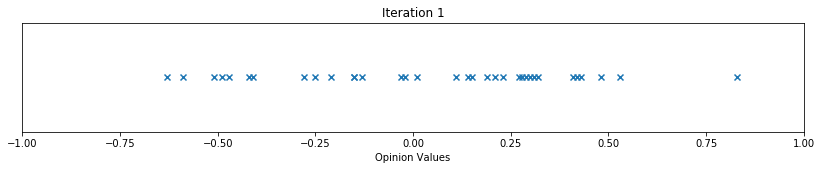

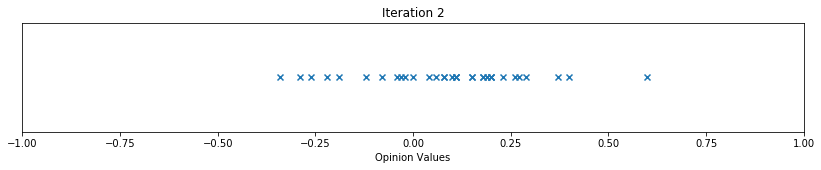

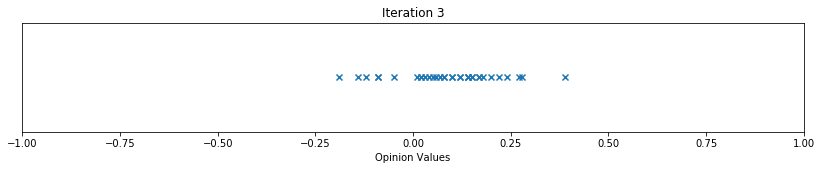

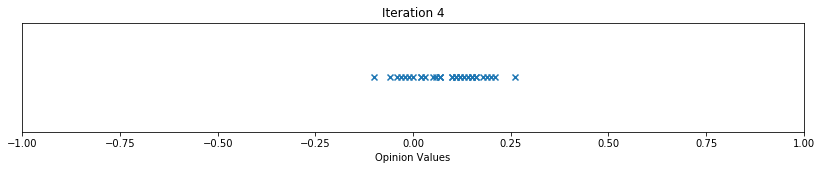

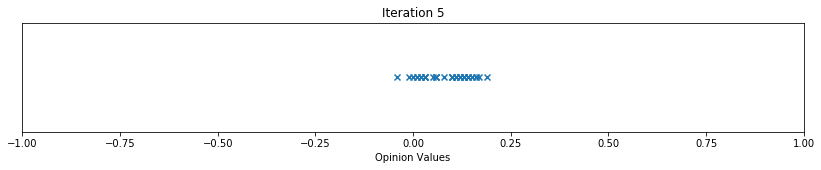

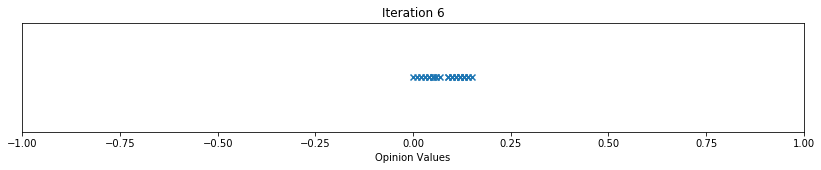

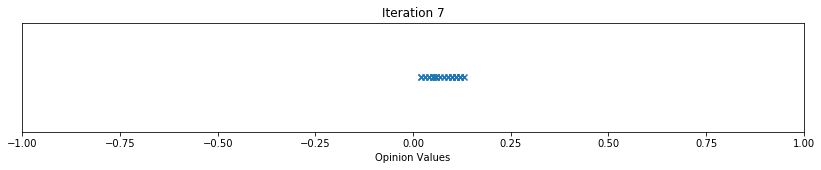

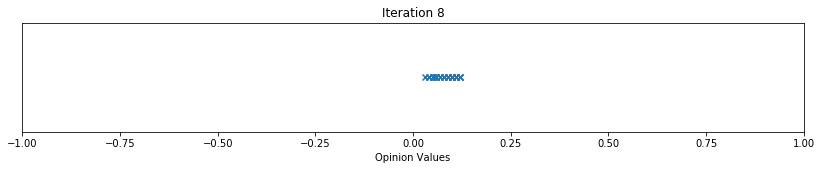

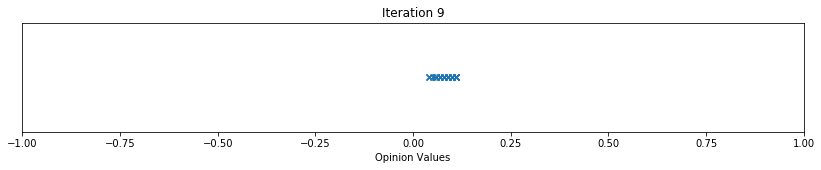

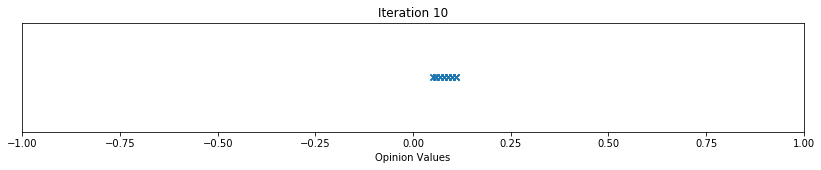

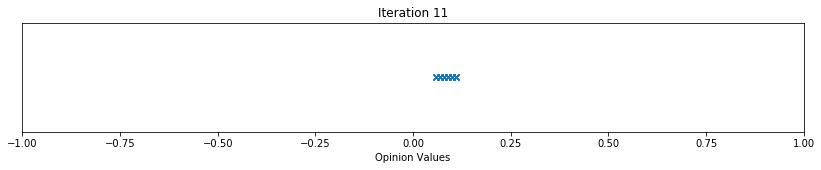

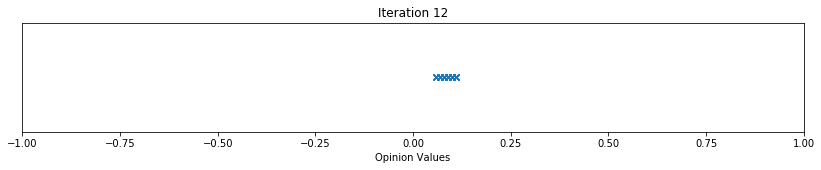

In [37]:
average_degroot(G, 12, 1)

#### Model 2: All the neighboring opinions are weighted based on popularity

Suppose students in the karate club take the opinions of different neighbors with different weights. They value the opinions of members that are more popular heavier than other members and value a neighbor's opinion less if they are not as popular. 

Ways to define popularity: 
1. Degree Centrality (the more connection a node has, the more popular they are)
2. The vector of social powers $p^T$ (eigen centrality)
3. more types of centrality

The opinion of the node $n$ at time $(t+1)$ equals to the popularity-weighted sum of all the neighbors of $n$ and $n$ themselves at time $t$.

note: when prejudice/stubbornness is introduced, how stubborn should the popular node be for the whole network to converge towards him/her?

In [41]:
# degree centrality
deg_cent = list(nx.degree_centrality(G).values())

In [42]:
# betweenness centrality
btwn_cent = list(nx.degree_centrality(G).values())

In [43]:
# eigenvector centrality 
eig_cent = list(nx.eigenvector_centrality(G).values())

In [47]:
#initialize opinion
for n in G:
    G.nodes[n]['opinion'] = opinion[n-1]

In [39]:
def weighted_centrality(G, t, graph_interval, cent): #cent is whatever centrality list, pre-generated
    y = np.zeros(len(G))
    iteration = 0

    for i in range(t):
        iteration += 1
        if (i%graph_interval == 0):
            old_op = list(nx.get_node_attributes(G, 'opinion').values())
            plt.figure(figsize=(14,2))
            ax = plt.scatter(old_op, y, marker='x')
            ax.axes.yaxis.set_visible(False)
            plt.xlim([-1, 1])
            plt.title(('Iteration {}'.format(iteration)))
            plt.xlabel('Opinion Values')
            plt.show()
        

        for n in G:
            neighbors = [neigh for neigh in G.neighbors(n)]
            weights = [cent[neigh-1] for neigh in neighbors]
            weights.insert(0,cent[n-1]) #insert node value to the beginning of the list
            weights_norm = [round(i/sum(weights),3) for i in weights] #need to work on sum
            op_sum = 0

            for neigh in neighbors: 
                op_sum = op_sum + old_op[neigh-1]*weights_norm[neighbors.index(neigh)+1]

            op_sum = op_sum + old_op[n-1]*weights_norm[0]
            G.nodes[n]['opinion'] = round(op_sum, 2)

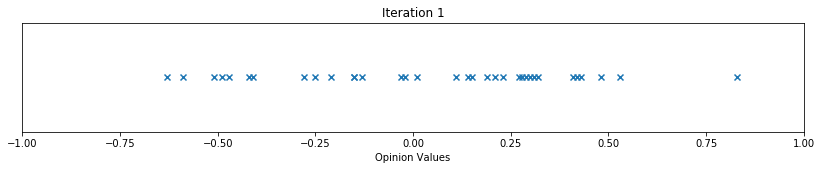

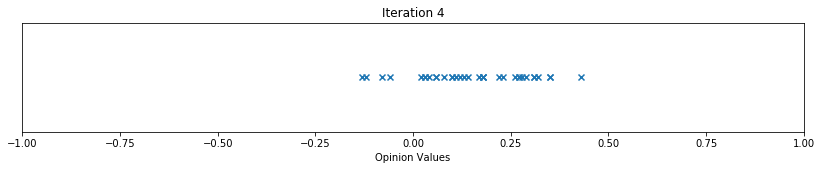

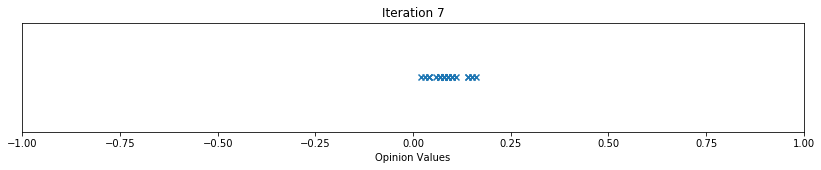

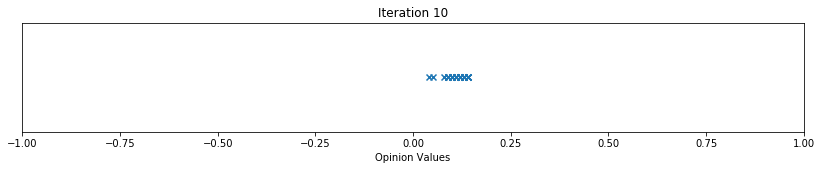

In [48]:
weighted_centrality(G, 10, 3, eig_cent)

### Q: can we make a prediction on the final mean? 
rank the agents by centrality, compare the deviation of the final mean to the true mean and the mean of opinions of the most important people. interpretation of social power. 

Result: The value in which the weighted opinion converge to is highly dependent on the original opinions of node 1 and 34, which have the highest degree centrality in the whole network.

#### Model 3: Neighboring opinions are weighted based on similarity
*Persuasion bias* is the tendency of people failing to adjust properly for repetitive information that is known and expected, and exposure to such information causes the individual's opinions to shift towards the source. 

Agents assign more weight to opinions that already conform to their beliefs. This phenomenon is a special case of flocking behavior

Measuements of similarity: 
1. Euclidean Distance / Manhattan Distance
2. Cosine Similarity
3. Bounded Confidence

#### Model 3-1: Bounded Confidence Model of Hegselmann and Krause

The confidence region of an agent is captured by the set
$$
Si(z) = \{ j||zj−zi|≤ \epsilon \}
$$

Each agent i iteratively updates its opinion by averaging the opinions of agents in Si(z)

In [68]:
#initialize opinion
for n in G:
    G.nodes[n]['opinion'] = opinion[n-1]

In [53]:
def bounded_confidence(G, t, graph_interval, e=1):
    y = np.zeros(len(G))
    iteration = 0

    for i in range(t):
        iteration += 1
        if (i%graph_interval == 0):
            old_op = list(nx.get_node_attributes(G, 'opinion').values())
            plt.figure(figsize=(14,2))
            ax = plt.scatter(old_op, y, marker='x')
            ax.axes.yaxis.set_visible(False)
            plt.xlim([-1, 1])
            plt.title(('Iteration {}'.format(iteration)))
            plt.xlabel('Opinion Values')
            plt.show()
        

        for node in G:
            neighbors = [neigh for neigh in G.neighbors(node)]
            node_op = old_op[node-1]
            op_sum = 0
            counted_neighbors = 0

            for neigh in neighbors: 
                if (abs(node_op - old_op[neigh-1]) < e):
                    op_sum = op_sum + old_op[neigh-1]
                    counted_neighbors +=1
            
            if (counted_neighbors == 0):
                neigh_op = 0
            else:
                neigh_op = op_sum/counted_neighbors

            op_sum = 0.5*old_op[node-1] + 0.5*neigh_op
            G.nodes[node]['opinion'] = round(op_sum, 2)    

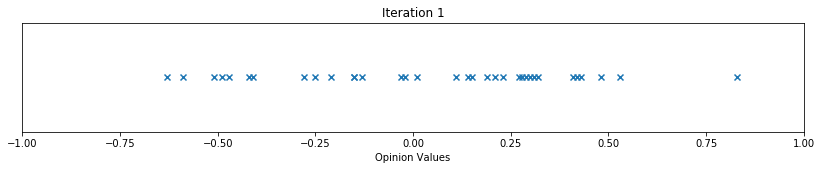

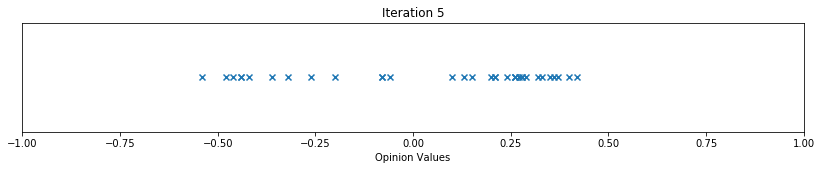

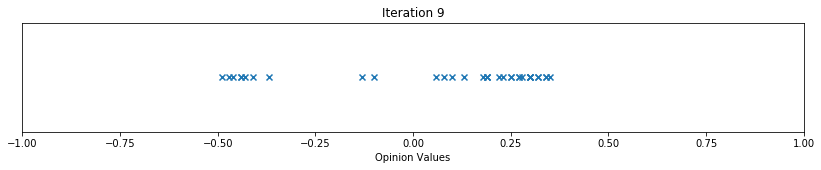

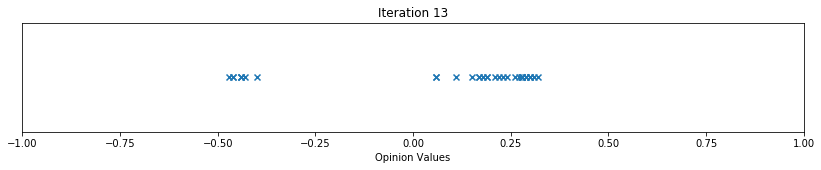

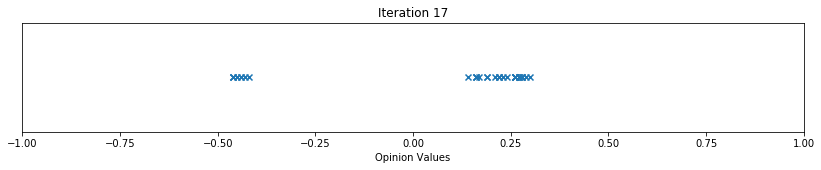

In [69]:
bounded_confidence(G, 20, 4, 0.4)

#### Model 3-2: Distance Weighted Model

Because node opinion is a scalar value, we use $(2-dist)$ as the simple similarity measure. 

In this model we also assume that each node has a **susceptibility parameter** to determine the percentage of opinion that is influenced by their neighbor's opinions compared to their own opinions. Default value is 0.5 (mean of the uniform distribution), meaning at default 50% of node $n$'s opinion at time $(t+1)$ is influenced by its peers opinions ar $t$ and 50% by its own opinion at $t$. 
20% is the self-weight/self-confidence, needs justification. 

We name the normally distributed value susceptibility (sus).

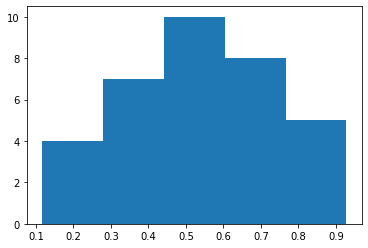

In [83]:
lower = 0
upper = 1
mu = 0.5
sigma = 0.17
N = len(G)

sus = truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,
                    loc=mu,scale=sigma,size=N)
plt.hist(sus, 5)
plt.show()

In [84]:
sus

array([0.44258114, 0.47282589, 0.66823011, 0.59503669, 0.84158414,
       0.38746601, 0.55184581, 0.39682495, 0.1163803 , 0.57364248,
       0.63495692, 0.68452971, 0.71798169, 0.65338899, 0.25110047,
       0.41718281, 0.39165427, 0.47294233, 0.69257334, 0.46899447,
       0.65387588, 0.35307593, 0.4347871 , 0.92780663, 0.47945497,
       0.25762762, 0.81000963, 0.31626598, 0.20227463, 0.86375247,
       0.4612749 , 0.54600078, 0.74447824, 0.88453658])

In [115]:
#initialize opinion
for n in G:
    G.nodes[n]['opinion'] = opinion[n-1]

In [120]:
def distance_weighted(G, t, graph_interval, sus = [0.5]*len(G)):
    y = np.zeros(len(G))
    iteration = 0

    for i in range(t):
        iteration +=1
        if (i%graph_interval == 0):
            old_op = list(nx.get_node_attributes(G, 'opinion').values())
            plt.figure(figsize=(14,2))
            ax = plt.scatter(old_op, y, marker='x')
            ax.axes.yaxis.set_visible(False)
            plt.xlim([-1, 1])
            plt.title(('Iteration {}'.format(iteration)))
            plt.xlabel('Opinions')
            plt.show()

        for node in G:
            node_sus = sus[node-1]
            neighbors = [neigh for neigh in G.neighbors(n)]
            dist = [(2 - (abs(old_op[node-1] - old_op[neigh-1]))) for neigh in neighbors]
            dist_norm = [round(i/sum(dist),3) for i in dist]

            op_sum = 0

            for neigh in neighbors: 
                op_sum = op_sum + old_op[neigh-1]*dist_norm[neighbors.index(neigh)]

            op_sum = op_sum*node_sus + old_op[node-1]*(1-node_sus)
            G.nodes[node]['opinion'] = round(op_sum, 2)

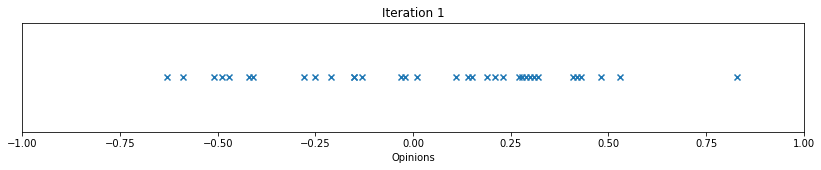

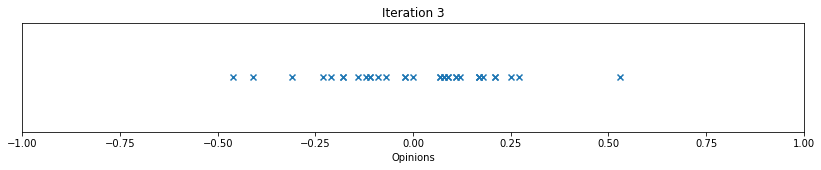

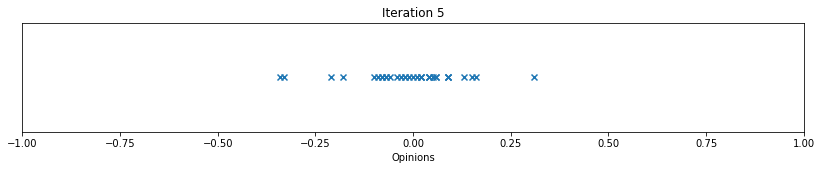

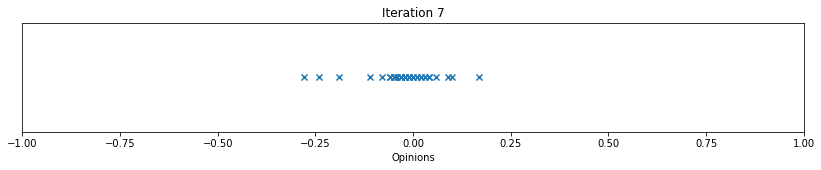

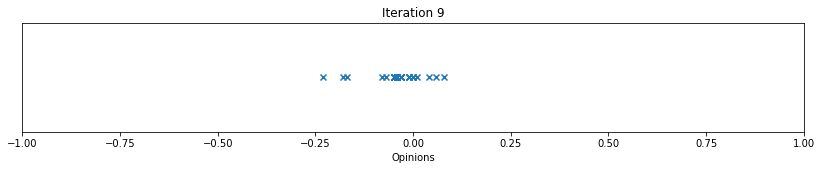

In [105]:
distance_weighted(G, 10, 2, sus)

#### Model 4: Introducing the prejudice parameter: the Friedkin–Johnsen model

The model proposes that the agent's opinions evolves with:

$x(t+1) = \varLambda Wx(k) + (1-\varLambda)u $

Here, a diagonal matrix $\varLambda$ = $\text{diag} (\lambda_1, ..., \lambda_n)$ is introduced, where $\lambda \in [0, 1]$ stands for the susceptibility of agent $i$ to the process of social influence. $u$ is a constant vector of the agents’ prejudices. In the case $\varLambda = 0$, the model turns into the French- DeGroot model. If $1 − \lambda_i = 0$ then agent $i$ is independent of the prejudice vector $u$ and applies the usual French-DeGroot “opinion pooling” rule. 

We also assume that prejudice $u$ is the node' initial opinion. 

In [134]:
#initialize opinion
for n in G:
    G.nodes[n]['opinion'] = opinion[n-1]

In [132]:
def friedkin_johnsen (G, t, graph_interval, sus = [0.5]*len(G)):
    prejudice = list(nx.get_node_attributes(G, 'opinion').values())
    y = np.zeros(len(G))
    iteration = 0

    for i in range(t):
        iteration +=1
        if (i%graph_interval == 0):
            old_op = list(nx.get_node_attributes(G, 'opinion').values())
            plt.figure(figsize=(14,2))
            ax = plt.scatter(old_op, y, marker='x')
            ax.axes.yaxis.set_visible(False)
            plt.xlim([-1, 1])
            plt.title(('Iteration {}'.format(iteration)))
            plt.xlabel('Opinions')
            plt.show()


        for node in G:
            node_sus = sus[node-1]
            neighbors = [neigh for neigh in G.neighbors(n)]
            op_sum = 0

            for neigh in neighbors: 
                op_sum = op_sum + (old_op[neigh-1]/len(neighbors))

            op_sum = op_sum*node_sus + prejudice[node-1]*(1-node_sus)
            G.nodes[node]['opinion'] = round(op_sum, 2)

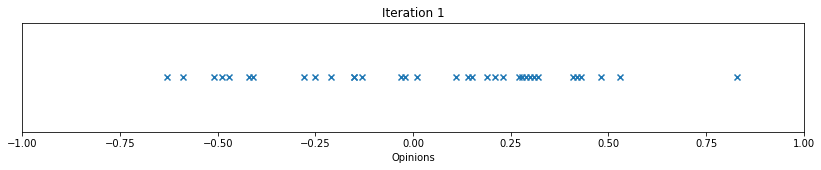

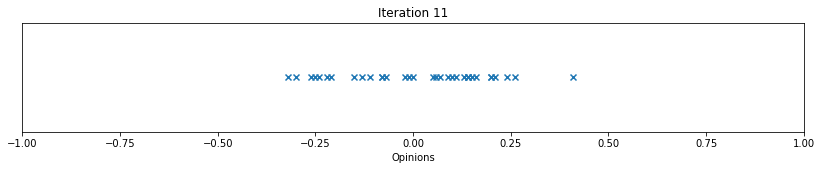

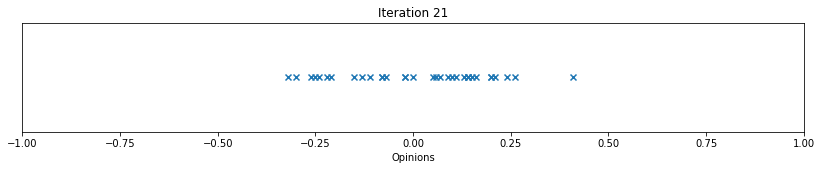

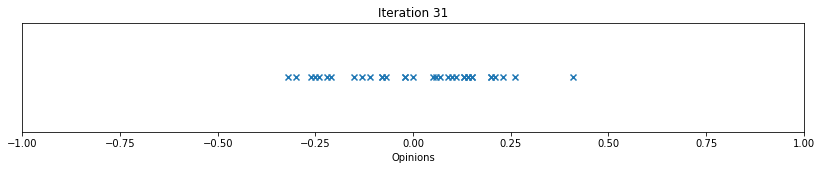

In [135]:
friedkin_johnsen(G, 40,10)

Observation: model does not converge very rapidly like other models given that we have some very stubborn nodes. 

In [137]:
df = pd.DataFrame(opinion, columns = ['prejudice'] )
df['susceptibility'] = sus
df

,prejudice,susceptibility
0,0.28,0.442581
1,0.43,0.472826
2,-0.47,0.668230
3,0.23,0.595037
4,-0.59,0.841584
5,0.41,0.387466
6,0.01,0.551846
7,0.11,0.396825
8,-0.25,0.116380
9,0.14,0.573642


### Simulating our own social network

After testing our models on an existing dataset, we would like to try implementing the same methods on models generated by ourselves. 

Two famous random graph models are:
1. Preferential Attachment Model
2. Small World Model

more graph generators at: https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.random_graphs

#### Preferential Attachement Model

* Start with 2 nodes connected by an edge. 
* At each time step, add a new node with an edge connecting it to an existing node. 
* Choose the node to connect to at random with probability
* The probability of connecting to a node $u$ of degree $k_u$ is $\frac{k_u}{\sum_j k_j}$

`barabasi_albert_graph(n, m)` returns a network with n nodes, and each new node attaches to m existing nodes according to the Preferential Attachement model. 

#### The Small World Model
* Start with a ring of n nodes, where each node is connected to its k nearest neighbors. 
* Fix a paremeter $p \in [0,1]$
* For each edge $(u,v)$, with probability $p$, we rewire the edge so it becomes $(u,w)$

`watts_strogatz_graph(n, k, p)` returns a small world network with n nodes, starting with a ring lattice with each node connected to its k nearest neighbors, and rewiring probability p. 

#### Model Evaluation Methods
Social networks tend to have high clustering coefficients and small average path lengths. Robustness can be anothe measure. 

In [138]:
# Prefential Attachement Model 
pa = nx.generators.random_graphs.barabasi_albert_graph(1000, 2)

In [139]:
# find out the nodes that have the highest degrees
degrees = sorted([val for (node, val) in pa.degree()], reverse=True)
degrees[:10]

[119, 68, 39, 38, 32, 29, 29, 28, 27, 26]

The average clustering coefficient is the average of of all local clustering coefficients. 

In [140]:
nx.average_clustering(pa)

0.02967343756564383

In [141]:
nx.average_shortest_path_length(pa)

4.026694694694695

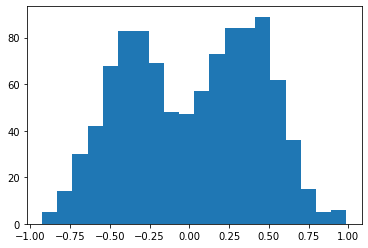

In [158]:
# Generating opinions for members in the preferential attachment model
sigma = 0.22
n = len(pa)

xr = truncnorm((-0.3-0.35)/sigma,(1-0.35)/sigma,loc=0.35,scale=sigma)
xl = truncnorm((-1-(-0.35))/sigma,(0.3-(-0.35))/sigma,loc=-0.35,scale=sigma)


r = [random.random() for x in range(n)]
init_op = []

for i in range(n):
    if r[i] < 0.5:
        init_op.append(xl.rvs())
    else:
        init_op.append(xr.rvs())
        
plt.hist(init_op, 20)
plt.show()

for n in pa:
    pa.nodes[n]['opinion'] = round(init_op[n-1], 2)
    
pa_opinion = list(nx.get_node_attributes(pa, 'opinion').values())

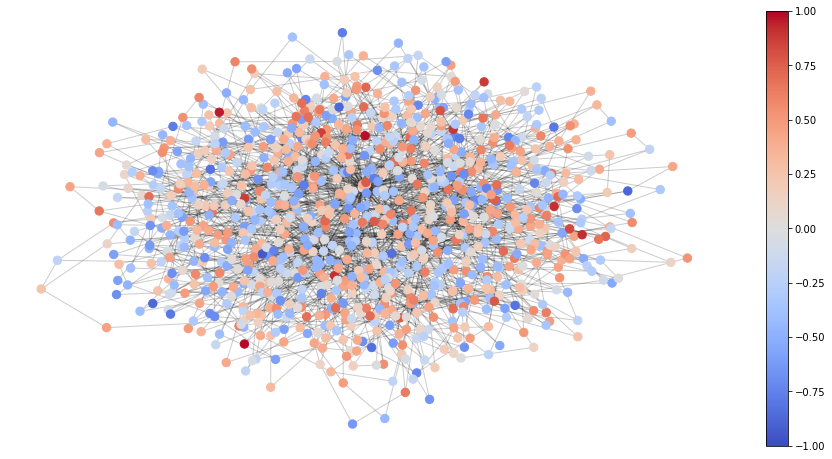

In [161]:
plt.figure(figsize=(16,8))

pa_pos = nx.spring_layout(pa)

nx.draw_networkx_edges(pa, pa_pos, alpha=0.2)
nc = nx.draw_networkx_nodes(pa, pa_pos, nodelist=pa.nodes(), node_color=pa_opinion, 
                            node_size=70, cmap=plt.cm.coolwarm)

nc.set_clim(-1,1)
plt.colorbar(nc)
plt.axis('off')
plt.show()

In [162]:
pa_deg_cent = list(nx.degree_centrality(pa).values())

In [163]:
pa_btwn_cent = list(nx.degree_centrality(pa).values())

In [164]:
pa_eig_cent = list(nx.eigenvector_centrality(pa).values())

#### Applying previous models to new Preferential Attachment network

In [180]:
# initialize opinion
for n in pa:
    pa.nodes[n]['opinion'] = pa_opinion[n-1]

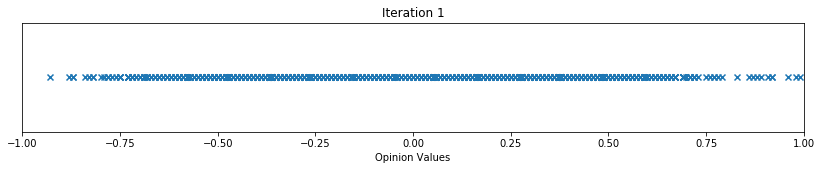

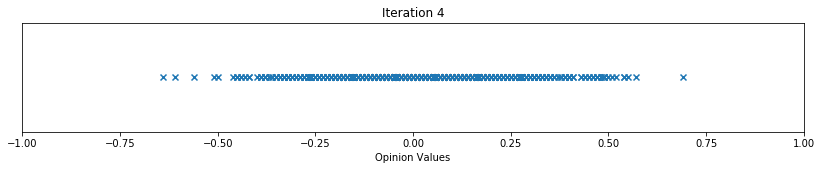

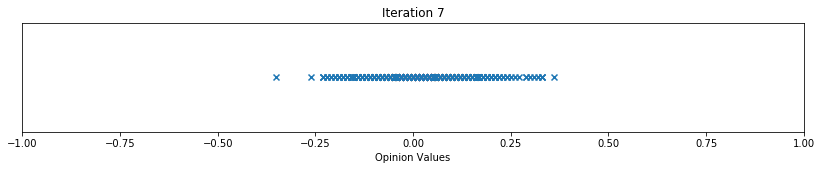

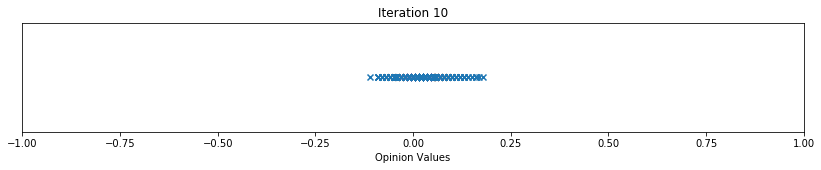

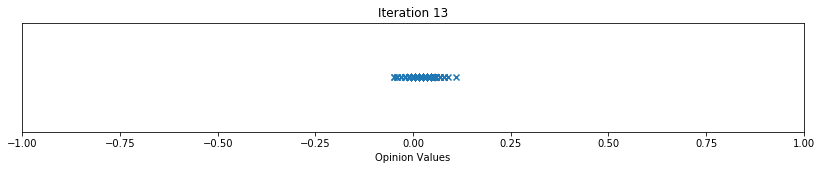

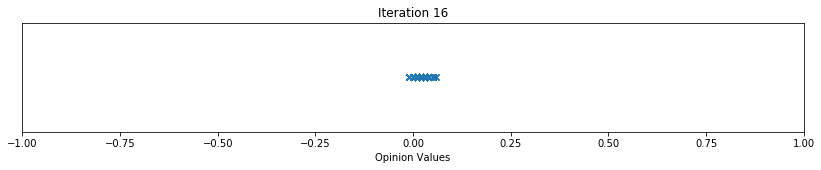

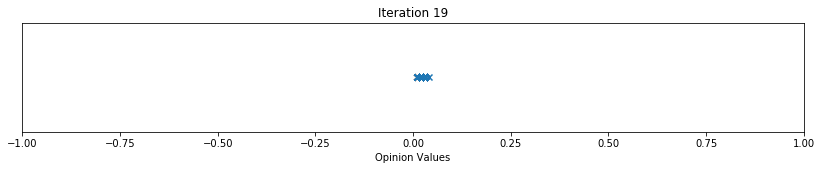

In [166]:
simple_degroot(pa, 20, 3)

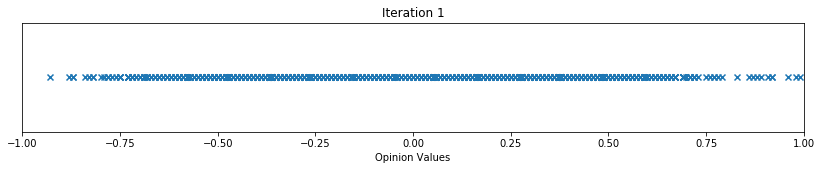

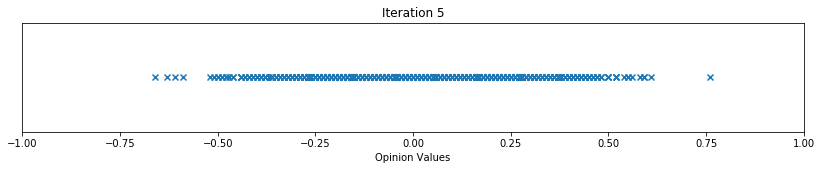

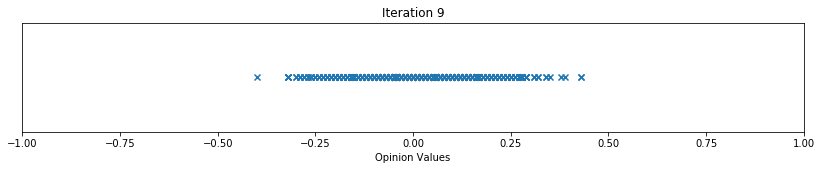

In [168]:
average_degroot(pa, 12, 4)

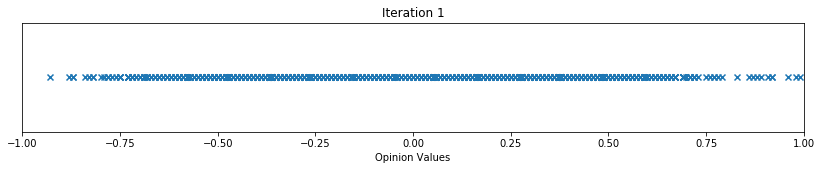

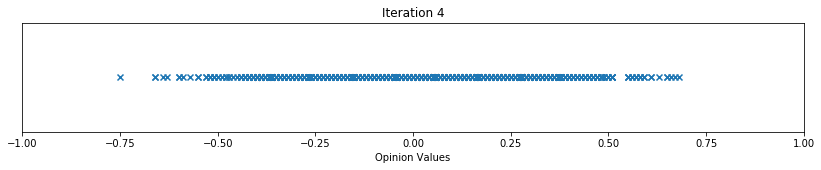

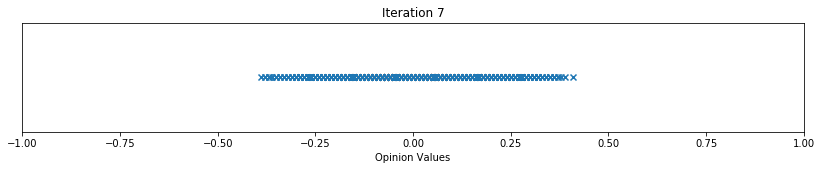

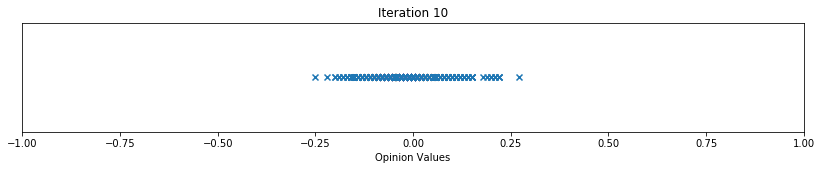

In [170]:
weighted_centrality(pa, 10, 3, pa_eig_cent)

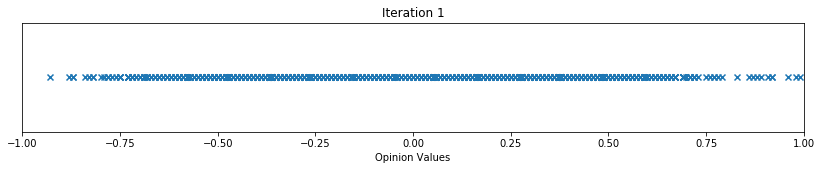

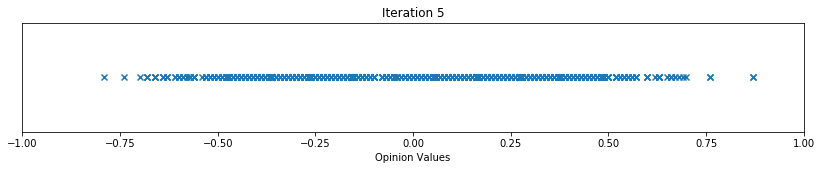

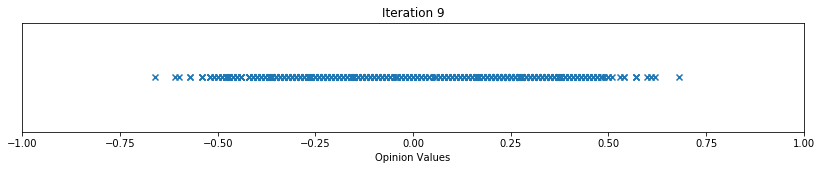

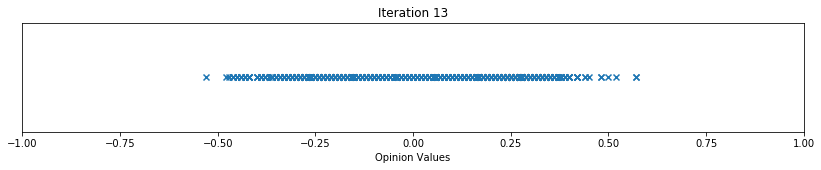

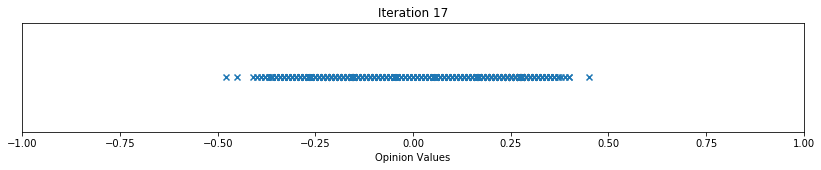

In [181]:
bounded_confidence(pa, 20, 4, 0.3)

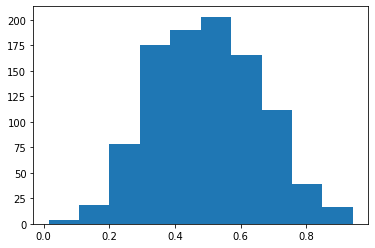

In [174]:
# creating pa_sus
lower = 0
upper = 1
mu = 0.5
sigma = 0.17
N = len(pa)

pa_sus = truncnorm.rvs((lower-mu)/sigma,(upper-mu)/sigma,
                    loc=mu,scale=sigma,size=N)
plt.hist(sus, 10)
plt.show()

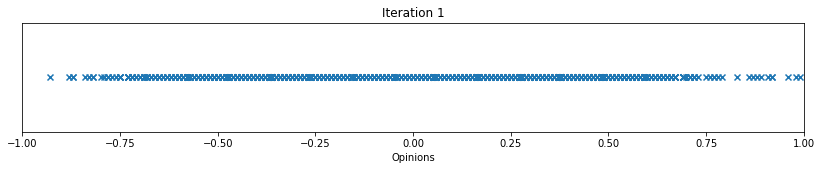

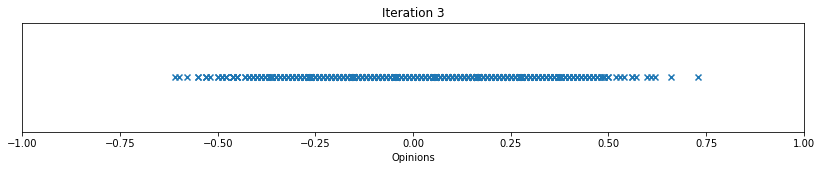

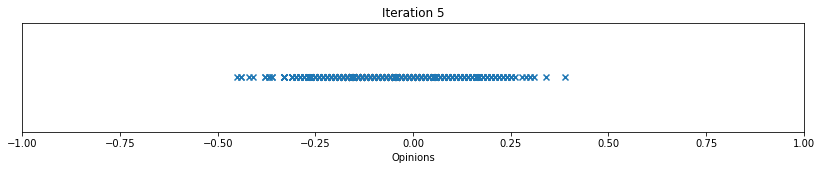

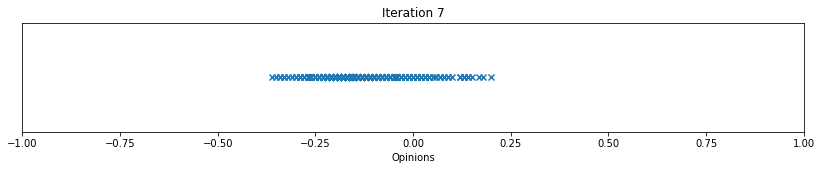

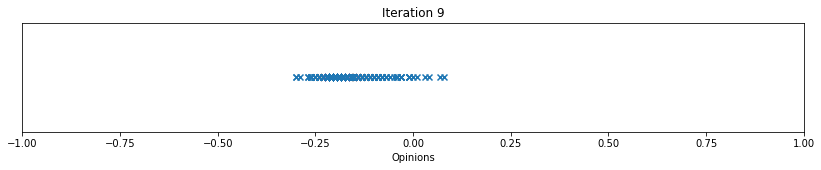

In [177]:
distance_weighted(pa, 10, 2, pa_sus)

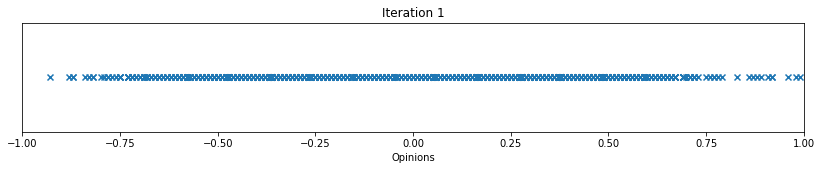

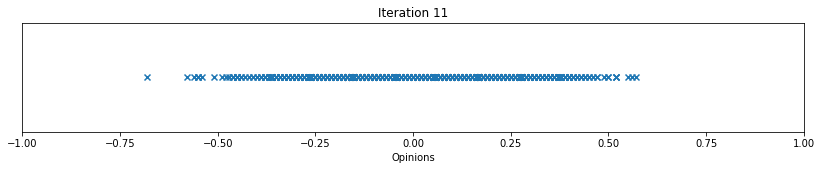

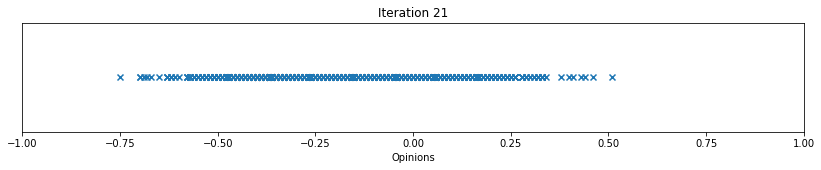

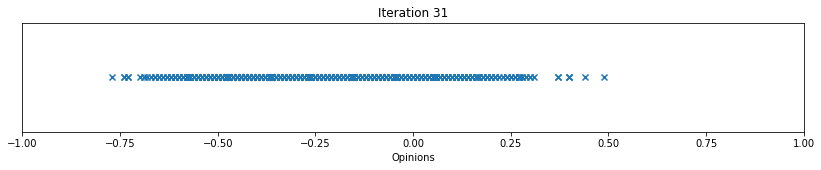

In [179]:
friedkin_johnsen(pa, 40,10, sus)

### Dynamic Graphs: Integrating *homophily* into our simulated networks

#### Prioritize Visualization 

In real life social networks, we often look for "our type" of people in a social network, and befriend those that we have more in common with. This behavior is not accounted when we initiated the above 2 models. So I propose methods to improve the social network models above that will make them more similar to real-life models. 

For the preferential attachement model, one way to tailor it towards reality might be new nodes have a higher probability of attaching nodes that are more similar.

For the small world model, we can make it more possible to rewire to another node that has a similar belief system. 
In our previous models, human relationships are static, and that is not what it's like in real life. In real life, we often make and lose friends because of our beliefs. 

After a short period of time, people will become more distant with friends that have very distinct beliefs and make new connections that have similar beliefs. 

Example: every 10t, every node will rewire its relationship with the node that it disagrees with the most to another node with higher similarity using link prediction. (Jaccard, preferential attachment, or community structure)


In [183]:
# initiate dynamic small world model
dm = nx.generators.random_graphs.watts_strogatz_graph(20, 2, 0.3)
dm = nx.convert_node_labels_to_integers(G, first_label=1)

In [184]:
pos = nx.circular_layout(dm)

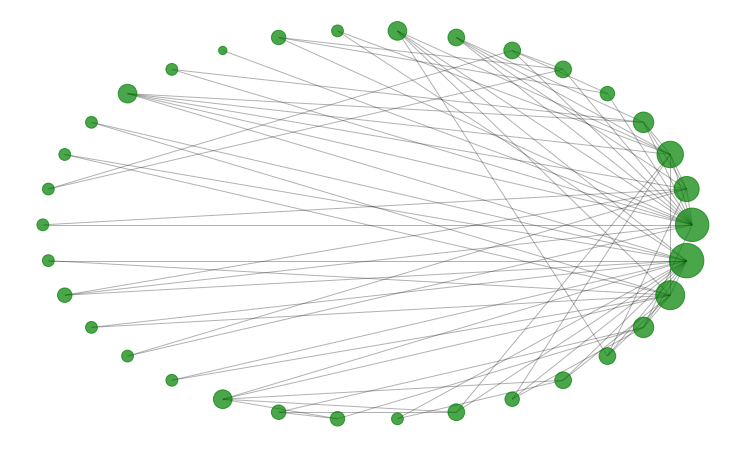

In [185]:
plt.figure(figsize=(13,8))
node_size = [G.degree(n)*70 for n in G]

nx.draw_networkx_edges(dm, pos, alpha=0.3)
nx.draw_networkx_nodes(dm, pos, nodelist=G.nodes(), node_color='green', node_size=node_size, alpha=0.7)

plt.axis('off')
plt.show()

### Proposed Objectives for Term 2

For term 2, we want to focus more specifically on the opinion dynamics of social media. Social media's hyperconnected world can break traditional assumptions, so our goal is to find a most fitted model to analyze networks on social media and apply the model to datasets. 

Characteristics of social media: easy to cut edges online, the agent has a lot of power in deciding which nodes to connect with, so preferntial bias and polarization are especially prevalent online. 

Other topics worth exploring are vector opinions, 